# Python for Finance - 2 - Portfolio Allocation and Optimization

* Author: Cleiber Garcia
* Date: November/2023

* Goal: I taught myself how to use Python with financial data for making predictions. I put together this notebook while taking an online course called Python para Finanças ('Python for Finance') on Udemy, taught by Jones Granatyr (from IA Expert Academy). This notebook closely mirrors the one covered in class, with the effort I made to infuse my personal touch whenever possible and appropriate. I assure you that I meticulously wrote it line by line.

* Disclaimer: **Please be advised that all forecasts and patterns developed in the course of this training are 
intended solely for educational purposes. Under no circumstances should they be construed as 
investment advice.**

For more information please contact me at cleiber.garcia@gmail.com

# Summary
* [1. Set Up](#SetUp)
* [2. Random Stock Allocation](#RandomStockAlloc)
* [3. Visualization](#Visualization)
* [4. Portfolio's Performance](#PortfolioPerformance)
* [5. Portfolio Optimization](#PortfolioOptimization)
* [6. Optimization Algorithms Applied to Portfolio](#OptAlgPortOpt)
* [7. Optimization of Portfolio AMBEV, ODONTOPREV, ... ](#OptAnotherPortfolio)

# 1. Set Up <a id='SetUp'></a>

## 1.1. Importing Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from pandas_datareader import data

In [3]:
import yfinance as yf

## 1.2 Loading the Working Dataset

In [28]:
# Define the list of stocks
acoes = ['GOLL4.SA', 'CVCB3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']

In [29]:
# Load the list of stocks
acoes_df = pd.DataFrame()
for acao in acoes:
    acoes_df[acao] = yf.download(acao, start='2015-01-01')['Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [30]:
# Print the content of acoes_df
acoes_df

,GOLL4.SA,CVCB3.SA,WEGE3.SA,MGLU3.SA,TOTS3.SA,BOVA11.SA
Date,,,,,,
2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...
2023-10-24,7.48,2.88,35.009998,1.410000,25.600000,110.239998
2023-10-25,7.60,2.90,31.469999,1.440000,25.500000,109.349998
2023-10-26,8.23,2.96,32.660000,1.470000,26.400000,111.400002


In [31]:
acoes_df = acoes_df.rename(columns={'GOLL4.SA': 'GOL', 'CVCB3.SA': 'CVC', 'WEGE3.SA': 'WEGE',
                                    'MGLU3.SA': 'MGLU', 'TOTS3.SA': 'TOTS', 'BOVA11.SA': 'BOVA'})

acoes_df

,GOL,CVC,WEGE,MGLU,TOTS,BOVA
Date,,,,,,
2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...
2023-10-24,7.48,2.88,35.009998,1.410000,25.600000,110.239998
2023-10-25,7.60,2.90,31.469999,1.440000,25.500000,109.349998
2023-10-26,8.23,2.96,32.660000,1.470000,26.400000,111.400002


In [32]:
# Count the number of null values
acoes_df.isnull().sum()

GOL      0
CVC      0
WEGE     0
MGLU     0
TOTS     0
BOVA    27
dtype: int64

In [33]:
# Backup acoes_df
acoes_df_bkp = acoes_df.copy()

In [34]:
# Delete null values
acoes_df.dropna(inplace=True)

In [35]:
# Count the number of null values
acoes_df.isnull().sum()

GOL     0
CVC     0
WEGE    0
MGLU    0
TOTS    0
BOVA    0
dtype: int64

In [36]:
# Save acoes_df in a file
acoes_df.to_csv('acoes_new.csv')

In [37]:
dataset = pd.read_csv('acoes_new.csv')
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
1,2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2,2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
3,2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
4,2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...,...
2164,2023-10-24,7.48,2.88,35.009998,1.410000,25.600000,110.239998
2165,2023-10-25,7.60,2.90,31.469999,1.440000,25.500000,109.349998
2166,2023-10-26,8.23,2.96,32.660000,1.470000,26.400000,111.400002
2167,2023-10-27,7.77,2.85,31.629999,1.460000,25.559999,109.849998


# 2. Random Stock Allocation <a id='RandomStockAlloc'></a>

In [120]:
dataset = pd.read_csv('acoes_new.csv')
dataset

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
1,2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2,2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
3,2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
4,2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998
...,...,...,...,...,...,...,...
2164,2023-10-24,7.48,2.88,35.009998,1.410000,25.600000,110.239998
2165,2023-10-25,7.60,2.90,31.469999,1.440000,25.500000,109.349998
2166,2023-10-26,8.23,2.96,32.660000,1.470000,26.400000,111.400002
2167,2023-10-27,7.77,2.85,31.629999,1.460000,25.559999,109.849998


In [121]:
valor_aplicado = 5000
seed = 10

In [122]:
#melhores_pesos = [0.10, 0.10, 0.10, 0.40, 0.10, 0.20]

In [123]:
def alocacao_ativos(dataset, dinheiro_total, seed = 0,  melhores_pesos = []):
    print('vou executar a função')
    dataset = dataset.copy()
    
    if seed != 0:
        np.random.seed(seed)
    
    if len(melhores_pesos) > 0:
        pesos = melhores_pesos
    else:
        pesos = np.random.random(len(dataset.columns) - 1)
        pesos = pesos /pesos.sum()
        print(pesos, pesos.sum())
    
    colunas = dataset.columns[1:]
    #print(colunas)
    for i in colunas:
        dataset[i] = (dataset[i] / dataset[i][0])
        
    for i, acao in enumerate(dataset.columns[1:]):
        #print(i, acao)
        dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total
        
    #dataset['soma valor'] = dataset.sum(axis=1)
    
    datas = dataset['Date']
    #print(datas)
    
    dataset.drop(labels='Date', axis=1, inplace=True)
    
    dataset['soma valor'] = dataset.sum(axis=1)
    dataset['taxa retorno'] = 0.0
    
    for i in range(1, len(dataset)):
        dataset['taxa retorno'][i] = ((dataset['soma valor'][i] / dataset['soma valor'][i - 1]) - 1) * 100
     
    acoes_pesos = pd.DataFrame(data = {'Acoes': colunas, 'Pesos': pesos * 100})
    
    return dataset, datas, acoes_pesos, dataset.loc[len(dataset) - 1]['soma valor']

In [124]:
dataset, datas, acoes_pesos, soma_valor = alocacao_ativos(dataset, valor_aplicado, seed)

vou executar a função
[0.26617196 0.00716121 0.21866313 0.25840174 0.17202779 0.07757418] 1.0


dataset, datas, acoes_pesos, soma_valor = alocacao_ativos(dataset, 5000, 11)

In [125]:
dataset

,GOL,CVC,WEGE,MGLU,TOTS,BOVA,soma valor,taxa retorno
0,1330.859777,35.806036,1093.315674,1292.008683,860.138954,387.870876,5000.000000,0.000000
1,1318.430187,35.334904,1100.770128,1316.288069,833.710152,380.156147,4984.689588,-0.306208
2,1350.392100,34.863773,1084.441499,1298.945650,781.573275,382.290029,4932.506325,-1.046871
3,1291.795217,34.557537,1072.017409,1342.304468,776.047198,395.175284,4911.897113,-0.417824
4,1266.935952,33.332592,1090.120996,1331.899017,794.066880,398.129839,4914.485276,0.052692
...,...,...,...,...,...,...,...,...
2164,664.098153,6.784302,6462.348097,7824.906713,1848.720421,904.758486,17711.616172,-1.858949
2165,674.752124,6.831415,5808.914594,7991.394597,1841.498829,897.454109,17220.845667,-2.770896
2166,730.685492,6.972755,6028.571779,8157.881819,1906.492878,914.278834,17744.883556,3.043044
2167,689.845270,6.713632,5838.448291,8102.386078,1845.831729,901.557695,17384.782695,-2.029322


In [126]:
datas

0       2015-01-02
1       2015-01-05
2       2015-01-06
3       2015-01-07
4       2015-01-08
           ...    
2164    2023-10-24
2165    2023-10-25
2166    2023-10-26
2167    2023-10-27
2168    2023-10-30
Name: Date, Length: 2169, dtype: object

In [127]:
acoes_pesos

,Acoes,Pesos
0,GOL,26.617196
1,CVC,0.716121
2,WEGE,21.866313
3,MGLU,25.840174
4,TOTS,17.202779
5,BOVA,7.757418


In [128]:
soma_valor

16976.05860770952

[Summary](#Summary)

# 3. Visualization <a id='Visualization'></a>

## 3.1 Portfolio's Daily Return

In [129]:
figura = px.line(x=datas, y=dataset['taxa retorno'], title='Retorno Diario do Portfolio')
figura.show()

## 3.2 Patrimonial Evolution

In [130]:
figura = px.line(title='Evolução do Patrimônio')
for i in dataset.drop(columns=['soma valor', 'taxa retorno']).columns:
    figura.add_scatter(x=datas, y=dataset[i], name=i)
figura.show()

figura = px.line(x=datas, y=dataset['soma valor'], title='Evolução do Patrimônio')
figura.show()

[Summary](#Summary)

# 4. Portfolio's Performance <a id='PortfolioPerformance'></a>

## 4.1 Accumulated Return

In [131]:
dataset.loc[len(dataset) - 1]['soma valor'] / dataset.loc[0]['soma valor'] - 1

2.395211721541904

## 4.2 Standard Deviation

In [132]:
dataset['taxa retorno'].std()

3.014937869665765

## 4.3 Sharpe Ratio

"> 1 é aceitável (acceptable), > 2 é bom (good), > 3 é excelente (great)"

In [133]:
(dataset['taxa retorno'].mean() / dataset['taxa retorno'].std()) * np.sqrt(246)

0.530543191197043

### 4.3.1 Ganhos Aplicação Conservadora (conservative application gains)

In [134]:
dinheiro_aplicado

5000

In [135]:
soma_valor

16976.05860770952

In [136]:
soma_valor - dinheiro_aplicado

11976.058607709521

Taxa selic: https://www.infomoney.com.br/guias/taxa-selic/

In [137]:
taxa_selic_2015 = 14.25
taxa_selic_2016 = 13.75
taxa_selic_2017 = 7.00
taxa_selic_2018 = 6.50
taxa_selic_2019 = 4.50
taxa_selic_2020 = 2.00
taxa_selic_2021 = 9.25
taxa_selic_2022 = 13.75
taxa_selic_2023 = 12.75

In [138]:
valor_2015 = dinheiro_aplicado + (dinheiro_aplicado * taxa_selic_2015 / 100)
valor_2015

5712.5

In [139]:
valor_2016 = valor_2015 + (valor_2015 * taxa_selic_2016 / 100)
valor_2016

6497.96875

In [140]:
valor_2017 = valor_2016 + (valor_2016 * taxa_selic_2017 / 100)
valor_2017

6952.8265625

In [141]:
valor_2018 = valor_2017 + (valor_2017 * taxa_selic_2018 / 100)
valor_2018

7404.7602890625

In [142]:
valor_2019 = valor_2018 + (valor_2018 * taxa_selic_2019 / 100)
valor_2019

7737.974502070313

In [143]:
valor_2020 = valor_2019 + (valor_2019 * taxa_selic_2020 / 100)
valor_2020

7892.733992111719

In [144]:
valor_2021 = valor_2020 + (valor_2020 * taxa_selic_2021 / 100)
valor_2021

8622.811886382053

In [145]:
valor_2022 = valor_2021 + (valor_2021 * taxa_selic_2022 / 100)
valor_2022

9808.448520759584

In [146]:
valor_2023 = valor_2022 + (valor_2022 * taxa_selic_2023 / 100)
valor_2023

11059.025707156432

In [147]:
rendimentos = valor_2023 - valor_aplicado
rendimentos

6059.025707156432

In [148]:
ir = rendimentos * 15 / 100
ir

908.8538560734648

In [149]:
valor_2023 - ir

10150.171851082967

In [150]:
taxa_selic_historico = np.array([14.25, 13.75, 7.00, 6.50, 4.50, 2.00, 9.25, 13.75, 12.75])
taxa_selic_historico.mean() / 100

0.09305555555555556

In [152]:
taxa_retorno_media = dataset['taxa retorno'].mean()

taxa_selic_hist_media = taxa_selic_historico.mean() / 100

taxa_retorno_desvpad = dataset['taxa retorno'].std()

((taxa_retorno_media - taxa_selic_hist_media) / taxa_retorno_desvpad) * np.sqrt(246)

0.046447192512568

[Summary](#Summary)

# 5. Portfolio Optimization <a id='PortfolioOptimization'></a>

- Markowitz: https://pt.wikipedia.org/wiki/Teoria_moderna_do_portf%C3%B3lio

In [186]:
import sys

In [187]:
def alocacao_portfolio(dataset, dinheiro_total, sem_risco, repeticoes):
    dataset = dataset.copy()
    dataset_original = dataset.copy()

    lista_retorno_esperado = []
    lista_volatilidade_esperada = []
    lista_sharpe_ratio = []

    melhor_sharpe_ratio = 1 - sys.maxsize
    melhores_pesos = np.empty
    melhor_volatilidade = 0
    melhor_retorno = 0
  
    for _ in range(repeticoes):
        pesos = np.random.random(len(dataset.columns) - 1)
        pesos = pesos / pesos.sum()

        for i in dataset.columns[1:]:
            dataset[i] = dataset[i] / dataset[i][0]

        for i, acao in enumerate(dataset.columns[1:]):
            dataset[acao] = dataset[acao] * pesos[i] * dinheiro_total

        dataset.drop(labels = ['Date'], axis = 1, inplace=True)

        retorno_carteira = np.log(dataset / dataset.shift(1))
        matriz_covariancia = retorno_carteira.cov()

        dataset['soma valor'] = dataset.sum(axis = 1)
        dataset['taxa retorno'] = 0.0

        for i in range(1, len(dataset)):
            dataset['taxa retorno'][i] = np.log(dataset['soma valor'][i] / dataset['soma valor'][i - 1])

        #sharpe_ratio = (dataset['taxa retorno'].mean() - sem_risco) / dataset['taxa retorno'].std() * np.sqrt(246)
        retorno_esperado = np.sum(dataset['taxa retorno'].mean() * pesos) * 246
        volatilidade_esperada = np.sqrt(np.dot(pesos, np.dot(matriz_covariancia * 246, pesos)))
        sharpe_ratio = (retorno_esperado - sem_risco) / volatilidade_esperada

        if sharpe_ratio > melhor_sharpe_ratio:
            melhor_sharpe_ratio = sharpe_ratio
            melhores_pesos = pesos
            melhor_volatilidade = volatilidade_esperada
            melhor_retorno = retorno_esperado

        lista_retorno_esperado.append(retorno_esperado)
        lista_volatilidade_esperada.append(volatilidade_esperada)
        lista_sharpe_ratio.append(sharpe_ratio)
    
        dataset = dataset_original.copy()

    return melhor_sharpe_ratio, melhores_pesos, lista_retorno_esperado, lista_volatilidade_esperada, lista_sharpe_ratio, melhor_volatilidade, melhor_retorno

In [189]:
dataset = pd.read_csv('acoes_new.csv')
dataset.head()

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
1,2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2,2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
3,2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
4,2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998


In [200]:
valor_aplicado = 5000
seed = 15
numero_repeticoes = 1000

In [201]:
sharpe_ratio, melhores_pesos, ls_retorno, ls_volatilidade, ls_sharpe_ratio, melhor_volatilidade, melhor_retorno = alocacao_portfolio(dataset, dinheiro_aplicado, taxa_selic_historico.mean() / 100, numero_repeticoes)

In [202]:
sharpe_ratio

0.24142765222075946

In [203]:
melhores_pesos

array([0.01124496, 0.03431371, 0.45137014, 0.27763266, 0.13628772,
       0.0891508 ])

In [204]:
_, _, acoes_pesos, soma_valor = alocacao_ativos(pd.read_csv('acoes_new.csv'), dinheiro_aplicado, melhores_pesos=melhores_pesos)

vou executar a função


In [205]:
acoes_pesos

,Acoes,Pesos
0,GOL,1.124496
1,CVC,3.431371
2,WEGE,45.137014
3,MGLU,27.763266
4,TOTS,13.628772
5,BOVA,8.915080


In [207]:
soma_valor

23000.70870094665

In [210]:
print(ls_retorno[:10])

[0.14711101071008775, 0.11587493139748845, 0.08141060392293001, 0.1326766804244242, 0.07641632374005226, 0.10474415534892523, 0.066606993584688, 0.11286074374234895, 0.05642339577281133, 0.09838882069643376]


In [211]:
print(ls_volatilidade[:10])

[0.3386923983418446, 0.33600928935802604, 0.42993533643086557, 0.34253352887527416, 0.4753125982354642, 0.3122325290017978, 0.46683979356060323, 0.37647997710441605, 0.3964384166136864, 0.38286200027593303]


In [212]:
print(ls_sharpe_ratio[:10])

[0.15960043809419555, 0.06791293147142217, -0.027085355973055916, 0.11567079286797581, -0.03500692360622097, 0.0374355607045106, -0.05665447191025312, 0.05260621916501141, -0.09240315329591486, 0.013929993410248226]


In [213]:
print(melhor_retorno, melhor_volatilidade)

0.1730831860589318 0.3314766546716846


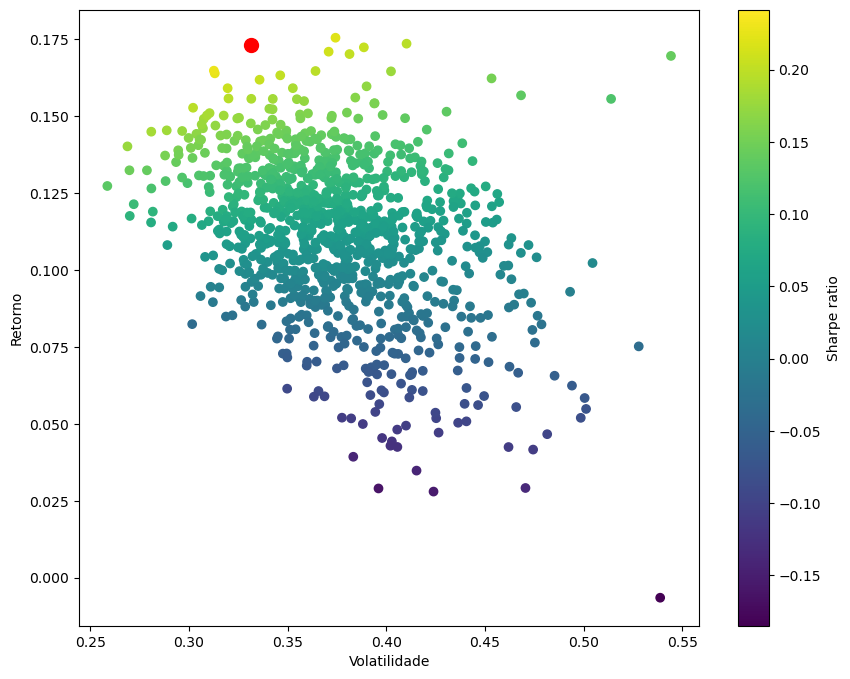

In [215]:
plt.figure(figsize=(10,8))
plt.scatter(ls_volatilidade, ls_retorno, c = ls_sharpe_ratio)
plt.colorbar(label = 'Sharpe ratio')
plt.xlabel('Volatilidade')
plt.ylabel('Retorno')
plt.scatter(melhor_volatilidade, melhor_retorno, c = 'red', s = 100);

[Summary](#Summary)

# 6. Optimization Algorithms Applied to Portfolio Optimization <a id='OptAlgPortOpt'></a>

## 6.1 Initial Set Up

In [219]:
!pip install mlrose

  Using cached mlrose-1.3.0-py3-none-any.whl (27 kB)
  Using cached sklearn-0.0.post10.tar.gz (3.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0.post10-py3-none-any.whl size=2981 sha256=a04078e1a8a1236e28d1866a1fa55a0aec3c0a4e88a6cf0f644281ccd58a63c9
  Stored in directory: c:\users\cleiber\appdata\local\pip\cache\wheels\b1\70\bc\4f2b2698e552905b6ba586cbb9f210df0dd75813576741bf90
Successfully built sklearn


In [235]:
!pip install -U scikit-learn

## 6.2 Continuous Optimization

In [289]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose

In [290]:
taxa_selic_historico

array([14.25, 13.75,  7.  ,  6.5 ,  4.5 ,  2.  ,  9.25, 13.75, 12.75])

In [291]:
dataset_original = pd.read_csv('acoes_new.csv')
dataset.head()

,Date,GOL,CVC,WEGE,MGLU,TOTS,BOVA
0,2015-01-02,14.99,15.20,5.923076,0.232812,11.910702,47.259998
1,2015-01-05,14.85,15.00,5.963461,0.237187,11.544731,46.320000
2,2015-01-06,15.21,14.80,5.875000,0.234062,10.822770,46.580002
3,2015-01-07,14.55,14.67,5.807692,0.241875,10.746248,48.150002
4,2015-01-08,14.27,14.15,5.905769,0.240000,10.995774,48.509998


In [292]:
dinheiro_aplicado = 5000
sem_risco = taxa_selic_historico.mean() / 100

In [293]:
np.random.seed(10)
pesos = np.random.random(len(dataset_original.columns) - 1)
pesos = pesos / pesos.sum()
pesos

array([0.26617196, 0.00716121, 0.21866313, 0.25840174, 0.17202779,
       0.07757418])

In [333]:
def fitness_function(solucao):
    dataset = dataset_original.copy()
    pesos = solucao / solucao.sum()

    for i in dataset.columns[1:]:
        dataset[i] = (dataset[i] / dataset[i][0])

    for i, acao in enumerate(dataset.columns[1:]):
        dataset[acao] = dataset[acao] * pesos[i] * dinheiro_aplicado

    dataset.drop(labels = ['Date'], axis = 1, inplace=True)
    dataset['soma valor'] = dataset.sum(axis = 1)
    dataset['taxa retorno'] = 0.0

    for i in range(1, len(dataset)):
        dataset['taxa retorno'][i] = ((dataset['soma valor'][i] / dataset['soma valor'][i - 1]) - 1) * 100

    sharpe_ratio = (dataset['taxa retorno'].mean() - sem_risco) / dataset['taxa retorno'].std() * np.sqrt(246)
    
    #### vale somente para genetic algorithm
    #if sharpe_ratio < 0:
    #    sharpe_ratio = 0

    return sharpe_ratio

In [334]:
fitness_function(pesos)

-0.2406966918858038

In [335]:
def visualiza_alocacao(solucao):
    colunas = dataset_original.columns[1:]
    for i in range(len(solucao)):
        print(colunas[i], solucao[i] * 100)

In [336]:
visualiza_alocacao(pesos)

AMBEV 26.617195545614496
ODONTOPREV 0.7161207195395352
VIVO 21.866313475981215
PETROBRAS 25.84017365648649
BBRASIL 17.202779081759033
BOVA 7.757417520619242


In [337]:
fitness = mlrose.CustomFitness(fitness_function)

In [245]:
problema_maximizacao = mlrose.ContinuousOpt(length=6, fitness_fn=fitness,
                                            maximize = True, min_val = 0, max_val = 1)

In [246]:
problema_minimizacao = mlrose.ContinuousOpt(length=6, fitness_fn=fitness,
                                            maximize = False, min_val = 0, max_val = 1)

## 6.3 Hill Climb

In [247]:
melhor_solucao, melhor_custo = mlrose.hill_climb(problema_maximizacao, random_state = 1)
melhor_solucao, melhor_custo

(array([0., 0., 0., 1., 0., 0.]), 0.28825653952737035)

In [248]:
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_solucao.sum()

(array([0., 0., 0., 1., 0., 0.]), 1.0)

In [249]:
visualiza_alocacao(melhor_solucao)

GOL 0.0
CVC 0.0
WEGE 0.0
MGLU 100.0
TOTS 0.0
BOVA 0.0


In [250]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes_new.csv'), dinheiro_aplicado, melhores_pesos=melhor_solucao)
soma_valor

vou executar a função


29422.88179360793

In [251]:
pior_solucao, pior_custo = mlrose.hill_climb(problema_minimizacao, random_state = 1)
pior_solucao, pior_custo

(array([0.117022  , 0.62032449, 0.        , 0.        , 0.14675589,
        1.        ]),
 -0.4688846804780936)

In [252]:
pior_solucao = pior_solucao / pior_solucao.sum()
pior_solucao, pior_solucao.sum()

(array([0.06211022, 0.32924139, 0.        , 0.        , 0.07789167,
        0.53075672]),
 1.0)

In [253]:
visualiza_alocacao(pior_solucao)

GOL 6.211021512851752
CVC 32.92413921219863
WEGE 0.0
MGLU 0.0
TOTS 7.789167493066905
BOVA 53.075671781882704


In [254]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes_new.csv'), dinheiro_aplicado, melhores_pesos=pior_solucao)
soma_valor

vou executar a função


7399.9296578352005

## 6.4 Simulated Annealing

In [255]:
melhor_solucao, melhor_custo = mlrose.simulated_annealing(problema_maximizacao, random_state = 1)

In [256]:
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_custo

(array([0.        , 0.        , 0.13333333, 0.66666667, 0.        ,
        0.2       ]),
 0.1992215311138117)

In [257]:
visualiza_alocacao(melhor_solucao)

GOL 0.0
CVC 0.0
WEGE 13.333333333333336
MGLU 66.66666666666666
TOTS 0.0
BOVA 20.00000000000001


In [258]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes_new.csv'), dinheiro_aplicado, melhores_pesos=melhor_solucao)
soma_valor

vou executar a função


25556.296614246156

## 6.5 Genetic Algorithm

In [306]:
problema_maximizacao_ag = mlrose.ContinuousOpt(length = 6, fitness_fn = fitness, 
                                               maximize = True, min_val = 0.1, max_val = 1)

In [307]:
melhor_solucao, melhor_custo = mlrose.genetic_alg(problema_maximizacao_ag, random_state = 1)

In [308]:
melhor_solucao = melhor_solucao / melhor_solucao.sum()
melhor_solucao, melhor_custo

(array([0.06843707, 0.08407594, 0.08434334, 0.62741684, 0.06435627,
        0.07137054]),
 0.17566673264576876)

In [309]:
visualiza_alocacao(melhor_solucao)

GOL 6.843707108363373
CVC 8.40759374041156
WEGE 8.434334469945242
MGLU 62.74168367495605
TOTS 6.435627010519633
BOVA 7.1370539958041475


In [310]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes_new.csv'), dinheiro_aplicado, melhores_pesos=melhor_solucao)
soma_valor

vou executar a função


22516.504215534267

[Summary](#Summary)

# 7. Optimization of Portfolio AMBEV, ODONTOPREV, ... <a id='OptAnotherPortfolio'></a>

In [316]:
dataset_original = pd.read_csv('acoes_ex.csv')
dinheiro_aplicado = 5000
sem_risco = taxa_selic_historico.mean() / 100
dataset_original

,Date,AMBEV,ODONTOPREV,VIVO,PETROBRAS,BBRASIL,BOVA
0,2015-01-02,16.020000,9.37,37.820000,9.000000,22.650000,47.259998
1,2015-01-05,15.730000,9.62,37.070000,8.270000,22.180000,46.320000
2,2015-01-06,16.330000,9.55,36.150002,8.060000,22.490000,46.580002
3,2015-01-07,16.559999,9.69,37.389999,8.450000,23.480000,48.150002
4,2015-01-08,16.540001,9.66,38.910000,9.020000,23.559999,48.509998
...,...,...,...,...,...,...,...
2188,2023-10-19,12.520000,10.38,45.779999,41.259998,49.500000,110.599998
2189,2023-10-20,12.490000,10.71,45.139999,40.810001,49.340000,109.500000
2190,2023-10-23,12.480000,11.04,45.080002,38.349998,49.270000,109.349998
2191,2023-10-24,12.520000,11.21,45.820000,38.939999,49.040001,110.239998


In [317]:
sharpe_ratio, melhores_pesos, _, _, _, _, _ = alocacao_portfolio(dataset_original, dinheiro_aplicado, 
                                                                 taxa_selic_historico.mean() / 100, 
                                                                 100)

In [318]:
sharpe_ratio

0.0732633740096923

In [319]:
_, _, acoes_pesos, soma_valor = alocacao_ativos(pd.read_csv('acoes_ex.csv'), dinheiro_aplicado, melhores_pesos=melhores_pesos)

vou executar a função


In [320]:
acoes_pesos

,Acoes,Pesos
0,AMBEV,12.816410
1,ODONTOPREV,1.291103
2,VIVO,5.005742
3,PETROBRAS,40.392794
4,BBRASIL,17.709432
5,BOVA,22.784518


In [321]:
soma_valor

14188.095385390714

## 7.1 Hill Climb Optimization

In [322]:
melhor_solucao, melhor_custo = mlrose.hill_climb(problema_maximizacao, random_state=1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
print(melhor_custo)
visualiza_alocacao(melhor_solucao)

C:\Users\Cleiber\AppData\Local\Temp\ipykernel_11604\3999111383.py:16: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Cleiber\AppData\Local\Temp\ipykernel_11604\3999111383.py:16: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Cleiber\AppData\Local\Temp\ipykernel_11604\3999111383.py:16: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Cleiber\AppData\Local\Temp\ipykernel_11604\3999111383.py:16: RuntimeWarning:

invalid value encountered in double_scalars



1.4550139756754286
AMBEV 0.0
ODONTOPREV 0.0
VIVO 0.01152445716320255
PETROBRAS 0.0
BBRASIL 0.0
BOVA 99.9884755428368


In [323]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes_ex.csv'), dinheiro_aplicado, melhores_pesos=melhor_solucao)
soma_valor

vou executar a função


11568.340179758037

## 7.2 Simulated Annealing Optimization

In [324]:
melhor_solucao, melhor_custo = mlrose.simulated_annealing(problema_maximizacao, random_state=1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
print(melhor_custo)
visualiza_alocacao(melhor_solucao)

C:\Users\Cleiber\AppData\Local\Temp\ipykernel_11604\3999111383.py:16: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Cleiber\AppData\Local\Temp\ipykernel_11604\3999111383.py:16: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Cleiber\AppData\Local\Temp\ipykernel_11604\3999111383.py:16: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Cleiber\AppData\Local\Temp\ipykernel_11604\3999111383.py:16: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Cleiber\AppData\Local\Temp\ipykernel_11604\3999111383.py:16: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Cleiber\AppData\Local\Temp\ipykernel_11604\3999111383.py:16: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Cleiber\AppData\Local\Temp\ipykernel_11604\3999111383.py:16: RuntimeWarning:

divide by zero encountered in double_scalars

C:\Users\Cleiber\AppData\Local\Temp\ipykernel_11604\3999111383.py:16: Ru

1.455131552125508
AMBEV 0.0
ODONTOPREV 0.0
VIVO 3.469446951953614e-15
PETROBRAS 0.0
BBRASIL 0.0
BOVA 100.0


In [325]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes_ex.csv'), dinheiro_aplicado, melhores_pesos=melhor_solucao)
soma_valor

vou executar a função


11568.980359474288

## 7.3 Genetic Algorithm Optimization

In [331]:
melhor_solucao, melhor_custo = mlrose.genetic_alg(problema_maximizacao_ag, random_state=1)
melhor_solucao = melhor_solucao / melhor_solucao.sum()
print(melhor_custo)
visualiza_alocacao(melhor_solucao)

0.820007563733487
AMBEV 7.487591387294161
ODONTOPREV 6.752345572116076
VIVO 9.03338439335404
PETROBRAS 8.103655647697838
BBRASIL 6.3664393615516595
BOVA 62.25658363798623


In [332]:
_, _, _, soma_valor = alocacao_ativos(pd.read_csv('acoes_ex.csv'), dinheiro_aplicado, melhores_pesos=melhor_solucao)
soma_valor

vou executar a função


10865.40292161598